In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# sns.set_style('darkgrid',{'font.sans-serif':'Microsoft YaHei'}) # 注意！指定绘图风格后需要重新配置以显示中文
import seaborn as sns

# 数据读取

In [2]:
data_1 = pd.read_excel('附件一：已结束项目任务数据.xls')
data_1.columns=['任务号码', '纬度', '经度', '任务标价', '任务执行情况']
data_1

,任务号码,纬度,经度,任务标价,任务执行情况
0,A0001,22.566142,113.980837,66.0,0
1,A0002,22.686205,113.940525,65.5,0
2,A0003,22.576512,113.957198,65.5,1
3,A0004,22.564841,114.244571,75.0,0
4,A0005,22.558888,113.950723,65.5,0
...,...,...,...,...,...
830,A0831,23.044062,113.125784,65.5,0
831,A0832,22.833262,113.280152,72.0,1
832,A0833,22.814676,113.827731,85.0,1
833,A0834,23.063674,113.771188,65.5,1


In [3]:
data_2 = pd.read_excel('附件二：会员信息数据.xlsx')
data_2.columns=['会员编号', '会员位置', '预订任务限额', '预订任务开始时间', '信誉值']
la,lo = [], [] # 分割经纬度
for i in range(data_2.shape[0]):
    pack = data_2['会员位置'][i].split(' ')
    la.append(eval(pack[0]))
    lo.append(eval(pack[1]))
data_2['纬度'] = la
data_2['经度'] = lo
data_2

,会员编号,会员位置,预订任务限额,预订任务开始时间,信誉值,纬度,经度
0,B0001,22.947097 113.679983,114,06:30:00,67997.3868,22.947097,113.679983
1,B0002,22.577792 113.966524,163,06:30:00,37926.5416,22.577792,113.966524
2,B0003,23.192458 113.347272,139,06:30:00,27953.0363,23.192458,113.347272
3,B0004,23.255965 113.31875,98,06:30:00,25085.6986,23.255965,113.318750
4,B0005,33.65205 116.97047,66,06:30:00,20919.0667,33.652050,116.970470
...,...,...,...,...,...,...,...
1872,B1873,22.840505 113.277245,1,08:00:00,0.0124,22.840505,113.277245
1873,B1874,23.069415 113.287606,1,08:00:00,0.0121,23.069415,113.287606
1874,B1875,23.333446 113.301736,1,08:00:00,0.0062,23.333446,113.301736
1875,B1876,22.693506 113.994101,1,08:00:00,0.0036,22.693506,113.994101


## 异常值识别
### 任务

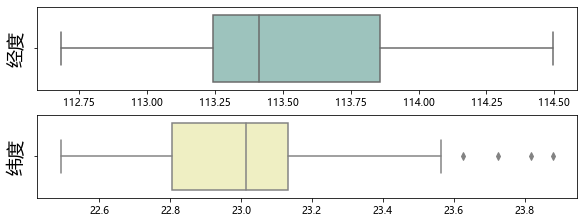

In [4]:
fig, [ax1,ax2] = plt.subplots(2,1,figsize=(8,3), constrained_layout=True)
sns.set_style('whitegrid',{'font.sans-serif':'Microsoft YaHei'}) # 设置主题和中文
sns.boxplot(x= '经度', data=data_1,color='#96cac1',ax=ax1,orient='h')
ax1.set_ylabel('经度',style='oblique',size=18)
ax1.set_xlabel(xlabel='')
sns.boxplot(x= '纬度',data=data_1,color='#f6f6bc',ax=ax2,orient='h')
ax2.set_ylabel('纬度',style='oblique',size=18)
ax2.set_xlabel(xlabel='')
plt.savefig('箱线图-任务.jpg',dpi=300)

In [5]:
from matplotlib.cbook import boxplot_stats  
# 提取离群值点
remove = boxplot_stats(data_1['纬度']).pop(0)['fliers'].tolist()
# 剔除离群值
index = []
for i in range(data_1['纬度'].shape[0]):
    if data_1['纬度'][i] in remove:
        index.append(i)
data_1_pre = data_1.drop(index=index,axis=0)
data_1_pre = data_1_pre.reset_index(drop=True)
data_1_pre

,任务号码,纬度,经度,任务标价,任务执行情况
0,A0001,22.566142,113.980837,66.0,0
1,A0002,22.686205,113.940525,65.5,0
2,A0003,22.576512,113.957198,65.5,1
3,A0004,22.564841,114.244571,75.0,0
4,A0005,22.558888,113.950723,65.5,0
...,...,...,...,...,...
826,A0831,23.044062,113.125784,65.5,0
827,A0832,22.833262,113.280152,72.0,1
828,A0833,22.814676,113.827731,85.0,1
829,A0834,23.063674,113.771188,65.5,1


### 会员

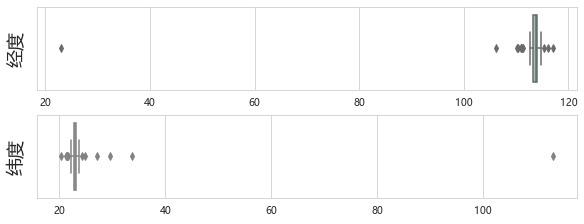

In [6]:
fig, [ax1,ax2] = plt.subplots(2,1,figsize=(8,3), constrained_layout=True)
sns.set_style('whitegrid',{'font.sans-serif':'Microsoft YaHei'}) # 设置主题和中文
sns.boxplot(x= '经度', data=data_2,color='#96cac1',ax=ax1,orient='h')
ax1.set_ylabel('经度',style='oblique',size=18)
ax1.set_xlabel(xlabel='')
sns.boxplot(x= '纬度',data=data_2,color='#f6f6bc',ax=ax2,orient='h')
ax2.set_ylabel('纬度',style='oblique',size=18)
ax2.set_xlabel(xlabel='')
plt.savefig('箱线图-会员.jpg',dpi=300)

In [7]:
from matplotlib.cbook import boxplot_stats  
# 提取离群值点
remove_1 = boxplot_stats(data_2['纬度']).pop(0)['fliers'].tolist()
remove_2 = boxplot_stats(data_2['经度']).pop(0)['fliers'].tolist()
# 剔除离群值
index = []
for i in range(data_2['纬度'].shape[0]):
    if data_2['纬度'][i] in remove_1 or data_2['经度'][i] in remove_2:
        index.append(i)
data_2_pre = data_2.drop(index=index,axis=0) 
data_2_pre = data_2_pre.reset_index(drop=True)
data_2_pre

,会员编号,会员位置,预订任务限额,预订任务开始时间,信誉值,纬度,经度
0,B0001,22.947097 113.679983,114,06:30:00,67997.3868,22.947097,113.679983
1,B0002,22.577792 113.966524,163,06:30:00,37926.5416,22.577792,113.966524
2,B0003,23.192458 113.347272,139,06:30:00,27953.0363,23.192458,113.347272
3,B0004,23.255965 113.31875,98,06:30:00,25085.6986,23.255965,113.318750
4,B0006,22.262784 112.79768,72,06:30:00,18237.6295,22.262784,112.797680
...,...,...,...,...,...,...,...
1860,B1873,22.840505 113.277245,1,08:00:00,0.0124,22.840505,113.277245
1861,B1874,23.069415 113.287606,1,08:00:00,0.0121,23.069415,113.287606
1862,B1875,23.333446 113.301736,1,08:00:00,0.0062,23.333446,113.301736
1863,B1876,22.693506 113.994101,1,08:00:00,0.0036,22.693506,113.994101


## 坐标系转换
### 任务位置转换

In [8]:
# 经纬度转换为平面直角坐标系
x=(data_1_pre['经度']-112.6)*np.cos(22.4/180)*109
y=(data_1_pre['纬度']-22.4)*110
data_1_pre['x'] = x
data_1_pre['y'] = y
data_1_pre

,任务号码,纬度,经度,任务标价,任务执行情况,x,y
0,A0001,22.566142,113.980837,66.0,0,149.347272,18.275648
1,A0002,22.686205,113.940525,65.5,0,144.987291,31.482579
2,A0003,22.576512,113.957198,65.5,1,146.790571,19.416301
3,A0004,22.564841,114.244571,75.0,0,177.872005,18.132489
4,A0005,22.558888,113.950723,65.5,0,146.090218,17.477653
...,...,...,...,...,...,...,...
826,A0831,23.044062,113.125784,65.5,0,56.867266,70.846864
827,A0832,22.833262,113.280152,72.0,1,73.563205,47.658864
828,A0833,22.814676,113.827731,85.0,1,132.787820,45.614357
829,A0834,23.063674,113.771188,65.5,1,126.672316,73.004138


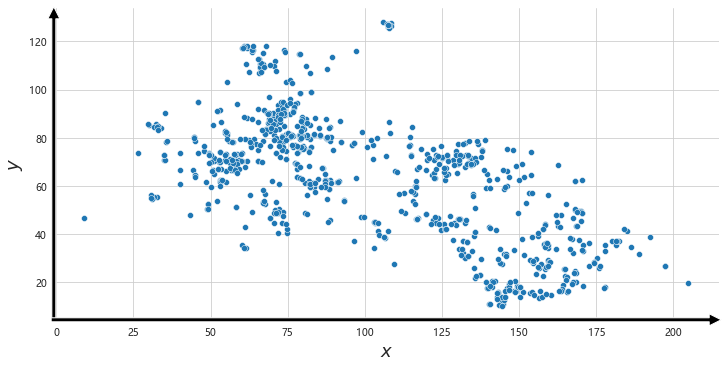

In [9]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
sns.set_style('whitegrid', {'font.sans-serif': 'Microsoft YaHei'})  # 设置主题和中文
sns.scatterplot(x=data_1_pre['x'], y=data_1_pre['y'])
# 绘制左y轴方向的箭头
ax.annotate('',
            xy=(0, 1.06),
            xycoords='axes fraction',
            xytext=(0, -0.06),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            zorder=4)
# 绘制下x轴方向的箭头
ax.annotate('',
            xy=(1.06, 0),
            xycoords='axes fraction',
            xytext=(-0.06, 0),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            zorder=4)

# 去除顶部的坐标轴
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('$x$', size=18)
ax.set_ylabel('$y$', size=18)
plt.savefig('任务坐标系.jpg',dpi=300)

### 会员位置转换

In [10]:
# 经纬度转换为平面直角坐标系
xm=(data_2_pre['经度']-112.6)*np.cos(22.4/180)*109
ym=(data_2_pre['纬度']-22.4)*110
data_2_pre['x'] = xm
data_2_pre['y'] = ym
data_2_pre

,会员编号,会员位置,预订任务限额,预订任务开始时间,信誉值,纬度,经度,x,y
0,B0001,22.947097 113.679983,114,06:30:00,67997.3868,22.947097,113.679983,116.807806,60.18067
1,B0002,22.577792 113.966524,163,06:30:00,37926.5416,22.577792,113.966524,147.799244,19.55712
2,B0003,23.192458 113.347272,139,06:30:00,27953.0363,23.192458,113.347272,80.822757,87.17038
3,B0004,23.255965 113.31875,98,06:30:00,25085.6986,23.255965,113.318750,77.737900,94.15615
4,B0006,22.262784 112.79768,72,06:30:00,18237.6295,22.262784,112.797680,21.380491,-15.09376
...,...,...,...,...,...,...,...,...,...
1860,B1873,22.840505 113.277245,1,08:00:00,0.0124,22.840505,113.277245,73.248841,48.45555
1861,B1874,23.069415 113.287606,1,08:00:00,0.0121,23.069415,113.287606,74.369456,73.63565
1862,B1875,23.333446 113.301736,1,08:00:00,0.0062,23.333446,113.301736,75.897716,102.67906
1863,B1876,22.693506 113.994101,1,08:00:00,0.0036,22.693506,113.994101,150.781892,32.28566


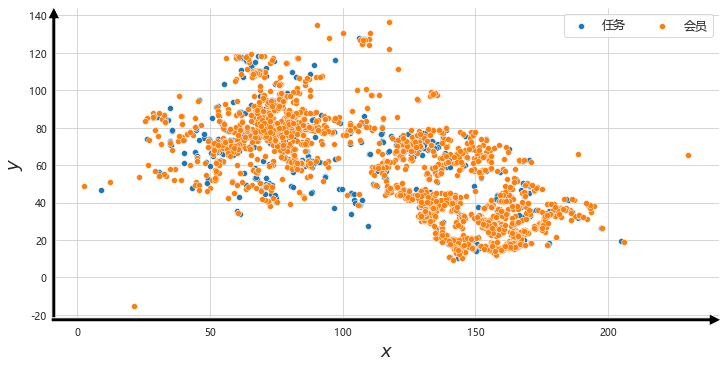

In [11]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
sns.set_style('whitegrid', {'font.sans-serif': 'Microsoft YaHei'})  # 设置主题和中文
sns.scatterplot(x=data_1_pre['x'], y=data_1_pre['y'], label='任务')
sns.scatterplot(x=data_2_pre['x'], y=data_2_pre['y'], label='会员')
# 绘制左y轴方向的箭头
ax.annotate('',
            xy=(0, 1.06),
            xycoords='axes fraction',
            xytext=(0, -0.06),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            zorder=4)
# 绘制下x轴方向的箭头
ax.annotate('',
            xy=(1.06, 0),
            xycoords='axes fraction',
            xytext=(-0.06, 0),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            zorder=4)

# 去除顶部的坐标轴
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('$x$', size=18)
ax.set_ylabel('$y$', size=18)
ax.legend(ncol=2, fontsize=12, frameon=True)
plt.savefig('任务与会员坐标系.jpg', dpi=300)


# 影响指标计算

In [12]:
# 计算任务富集度
def assignment_density_compute(r):
    num = data_1_pre.shape[0]
    density = np.zeros(shape=(num, 1))  # 初始化富集度
    x = data_1_pre['x'].values
    y = data_1_pre['y'].values
    for i in range(num):
        for j in range(num):
            x_distance = pow(x[j] - x[i], 2)
            y_distance = pow(y[j] - y[i], 2)
            if np.sqrt(x_distance + y_distance) <= r:
                density[i] += 1  # 每有一个在半径内，富集度+1
        density[i] -= 1  # 去除自己这个点，即i=j
    return density


# 计算会员密度
def member_density_compute(r):
    num_1 = data_1_pre.shape[0]
    num_2 = data_1_pre.shape[0]
    density = np.zeros(shape=(num_1, 1))  # 初始化会员密度
    x1, y1 = data_1_pre['x'].values, data_1_pre['y'].values
    x2, y2 = data_2_pre['x'].values, data_2_pre['y'].values
    for i in range(num_1):
        for j in range(num_2):
            x_distance = pow(x2[j] - x1[i], 2)
            y_distance = pow(y2[j] - y1[i], 2)
            if np.sqrt(x_distance + y_distance) <= r:  # 每在任务半径内
                density[i] += 1  # 富集度+
    return density


# 计算会员平均信誉度
def reputation_density_compute(r):
    num_1 = data_1_pre.shape[0]
    num_2 = data_1_pre.shape[0]
    density = np.zeros(shape=(num_1, 1))  # 初始化会员密度
    reputation = np.zeros(shape=(num_1, 1))  # 初始化会员信誉度
    x1, y1 = data_1_pre['x'].values, data_1_pre['y'].values
    x2, y2 = data_2_pre['x'].values, data_2_pre['y'].values
    reputation_data = data_2_pre['信誉值'].values
    for i in range(num_1):
        for j in range(num_2):
            x_distance = pow(x2[j] - x1[i], 2)
            y_distance = pow(y2[j] - y1[i], 2)
            if np.sqrt(x_distance + y_distance) <= r:  # 每在任务半径内
                density[i] += 1  # 富集度+
                reputation[i] += reputation_data[j]  # 信誉度+
    reputation = reputation / density
    return reputation


# 计算最邻近可达距离
def distance_compute(r):
    num_1 = data_1_pre.shape[0]
    num_2 = data_1_pre.shape[0]
    distance = np.zeros(shape=(num_1, 1))  # 初始化最邻近可达距离
    x1, y1 = data_1_pre['x'].values, data_1_pre['y'].values
    x2, y2 = data_2_pre['x'].values, data_2_pre['y'].values
    for i in range(num_1):
        distance_all = []
        for j in range(num_2):
            x_distance = pow(x2[j] - x1[i], 2)
            y_distance = pow(y2[j] - y1[i], 2)
            z = np.sqrt(x_distance + y_distance)
            if z <= r:  # 每在任务半径内
                distance_all.append(z)
        if distance_all != []:  # 如果任务径内存在会员
            distance[i] = np.min(np.array(distance_all))  # 计算最邻近可达距离
        else:  # 如果不存在会员
            distance[i] = 0  # 令最邻近可达距离为0
    return distance

## 响应半径r的选取

In [13]:
# 响应半径r
r = [1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80]

# 任务富集度
assignment_density = [assignment_density_compute(r=i) for i in r]
assignment_density = np.hstack(assignment_density)
# 平均任务富集度
mean_assignment_density = np.mean(assignment_density, axis=0)

# 会员密度
member_density = [member_density_compute(r=i) for i in r]
member_density = np.hstack(member_density)
# 平均会员密度
mean_member_density = np.mean(member_density, axis=0)

# 会员平均信誉度
reputation_density = [reputation_density_compute(r=i) for i in r]
reputation_density = np.hstack(reputation_density)
reputation_density = np.nan_to_num(reputation_density)  # 当会员密度为0时，无平均信誉度，令其为0
# 平均信誉度
mean_reputation_density = np.mean(reputation_density, axis=0)

# 任务最邻近可达距离
distance = [distance_compute(r=i) for i in r]
distance = np.hstack(distance)
# 平均最近邻可达距离
mean_distance = []
for i in range(distance.shape[1]):  # 计算均值时将不存在最近邻可达距离(即为0)的任务剔除
    distance_ = distance[:, i]
    distance_ = distance_[np.argwhere(distance_)[:, 0]]
    mean_distance.append(np.mean(distance_))
mean_distance = np.hstack(mean_distance)

C:\Users\Xu\AppData\Local\Temp\ipykernel_24632\2435735583.py:49: RuntimeWarning: invalid value encountered in true_divide
  reputation = reputation / density


In [14]:
Test_r = pd.DataFrame(
    [
        r, mean_assignment_density, mean_member_density,
        mean_reputation_density, mean_distance
    ],
    index=['响应半径r', '平均任务富集度', '平均会员密度', '平均信誉度', '平均最近邻可达距离']).T

Test_r

,响应半径r,平均任务富集度,平均会员密度,平均信誉度,平均最近邻可达距离
0,1.0,1.412756,1.173285,459.824037,0.502042
1,5.0,13.542720,14.498195,569.111524,1.299037
2,10.0,40.353791,44.669073,609.712964,1.582418
3,15.0,73.460890,83.813478,633.483860,1.642332
4,20.0,113.701564,127.760529,609.929091,1.732671
5,30.0,209.528279,220.340554,620.249053,1.757929
6,40.0,303.374248,302.338147,575.102195,1.757929
7,50.0,389.318893,375.628159,586.920739,1.757929
8,60.0,470.413959,444.927798,609.613470,1.757929
9,70.0,536.719615,502.752106,621.676584,1.757929


## 关系分析
以响应半径10为例
### 任务富集度与任务平均定价关系

In [15]:
price = data_1_pre['任务标价'].values
density = assignment_density[:,2]
mean_price = []
for i in range(np.min(density).astype(np.int64),np.max(density).astype(np.int64)+1): # 计算相同富集度的平均任务定价
    mean_price_ = 0
    count = 0
    for j in range(density.shape[0]):
        if i == density[j]:
            mean_price_ += price[j]
            count += 1
    if mean_price_ != 0:
        mean_price.append([i,mean_price_/count])
mean_price = np.vstack(mean_price)

In [16]:
z1 = np.polyfit(mean_price[:,0], mean_price[:,1], 1) #用1次多项式拟合，即最小二乘线性拟合
p1 = np.poly1d(z1) #合成多项式
y_pre1 = p1(mean_price[:,0])
p1

poly1d([-7.24390119e-02,  7.26427291e+01])

In [17]:
z2 = np.polyfit(mean_price[:,0], mean_price[:,1], 18) #用18次多项式拟合
p2 = np.poly1d(z2) #合成多项式
y_pre2 = p2(mean_price[:,0])
p2

poly1d([-3.45341184e-28,  3.74844475e-25, -1.86121912e-22,  5.59955107e-20,
       -1.13971388e-17,  1.65953652e-15, -1.78267887e-13,  1.43589227e-11,
       -8.72736382e-10,  3.99539306e-08, -1.36399353e-06,  3.40366936e-05,
       -5.99292076e-04,  6.97951243e-03, -4.66195128e-02,  9.92508433e-02,
        6.31188105e-01, -3.75194094e+00,  8.01259327e+01])

In [18]:
# 分级密度
grading_density = [
    np.mean(mean_price[:20, 1]),
    np.mean(mean_price[20:40, 1]),
    np.mean(mean_price[40:60, 1]),
    np.mean(mean_price[60:, 1])
]
grading_density

[73.68135374225449, 69.36886354809695, 68.16476641414141, 66.52667063492063]

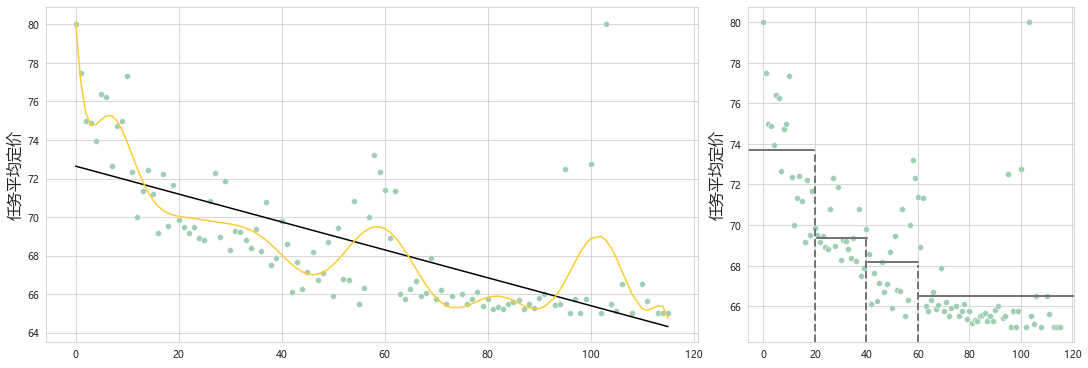

In [19]:
figure = plt.figure(figsize=(15, 5), layout='constrained')
ax1 = plt.subplot2grid((1,3),(0,0),colspan=2,rowspan=1,fig=figure)
ax2 = plt.subplot2grid((1,3),(0,2),colspan=1,rowspan=1,fig=figure)
sns.set_style('whitegrid', {'font.sans-serif': 'Microsoft YaHei'})  # 设置主题和中文

sns.scatterplot(x=mean_price[:,0],y=mean_price[:,1],color='#a0ceb1',ax=ax1)
sns.lineplot(x=mean_price[:,0],y=y_pre1,color='#000000',ax=ax1)
sns.lineplot(x=mean_price[:,0],y=y_pre2,color='#fecc32',ax=ax1)
ax1.set_ylabel('任务平均定价', size=15)

plt_y = [grading_density[0]]*20+[grading_density[1]]*20+[grading_density[2]]*20+[grading_density[3]]*50
sns.scatterplot(x=mean_price[:,0],y=mean_price[:,1],color='#a0ceb1',ax=ax2)
ax2.axhline(grading_density[0],0,0.2,linewidth=2,linestyle='-',color='#757575')
ax2.axhline(grading_density[1],0.21,0.365,linewidth=2,linestyle='-',color='#757575')
ax2.axhline(grading_density[2],0.367,0.52,linewidth=2,linestyle='-',color='#757575')
ax2.axhline(grading_density[3],0.52,1,linewidth=2,linestyle='-',color='#757575')
ax2.axvline(20,0,0.57,linewidth=2,linestyle='--',color='#757575')
ax2.axvline(40,0,0.31,linewidth=2,linestyle='--',color='#757575')
ax2.axvline(60,0,0.23,linewidth=2,linestyle='--',color='#757575')
ax2.set_ylabel('任务平均定价', size=15)
plt.savefig('任务富集度与任务平均定价.jpg', dpi=300)

### 会员密度与任务平均定价关系

In [20]:
price = data_1_pre['任务标价'].values
density = member_density[:,2]
mean_price = []
for i in range(np.min(density).astype(np.int64),np.max(density).astype(np.int64)+1): # 计算相同富集度的平均任务定价
    mean_price_ = 0
    count = 0
    for j in range(density.shape[0]):
        if i == density[j]:
            mean_price_ += price[j]
            count += 1
    if mean_price_ != 0:
        mean_price.append([i,mean_price_/count])
mean_price = np.vstack(mean_price)

In [21]:
z1 = np.polyfit(mean_price[:,0], mean_price[:,1], 1) #用1次多项式拟合，即最小二乘线性拟合
p1 = np.poly1d(z1) #合成多项式
y_pre1 = p1(mean_price[:,0])
p1

poly1d([-3.21399236e-02,  7.00988886e+01])

In [22]:
z2 = np.polyfit(mean_price[:,0], mean_price[:,1], 18) #用18次多项式拟合
p2 = np.poly1d(z2) #合成多项式
y_pre2 = p2(mean_price[:,0])
p2

poly1d([ 1.19860257e-31, -1.41403052e-28,  6.87313392e-26, -1.58868398e-23,
        5.98492573e-22,  7.29722059e-19, -2.47285711e-16,  4.47436360e-14,
       -5.39108145e-12,  4.59947264e-10, -2.83290213e-08,  1.25823468e-06,
       -3.96086789e-05,  8.51773749e-04, -1.16713118e-02,  8.81664718e-02,
       -2.29988160e-01, -8.31100913e-01,  7.58149591e+01])

In [23]:
# 分级密度
grading_density = [
    np.mean(mean_price[:20, 1]),
    np.mean(mean_price[20:50, 1]),
    np.mean(mean_price[50:80, 1]),
    np.mean(mean_price[80:, 1])
]
grading_density

[71.96541183175299, 68.12283276364158, 67.14730158730158, 66.23328125]

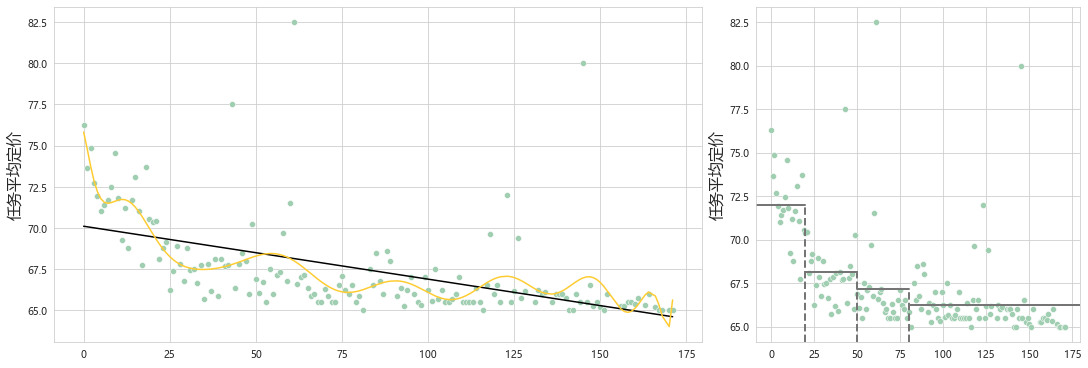

In [24]:
figure = plt.figure(figsize=(15, 5), layout='constrained')
ax1 = plt.subplot2grid((1,3),(0,0),colspan=2,rowspan=1,fig=figure)
ax2 = plt.subplot2grid((1,3),(0,2),colspan=1,rowspan=1,fig=figure)
sns.set_style('whitegrid', {'font.sans-serif': 'Microsoft YaHei'})  # 设置主题和中文

sns.scatterplot(x=mean_price[:,0],y=mean_price[:,1],color='#a0ceb1',ax=ax1)
sns.lineplot(x=mean_price[:,0],y=y_pre1,color='#000000',ax=ax1)
sns.lineplot(x=mean_price[:,0],y=y_pre2,color='#fecc32',ax=ax1)
ax1.set_ylabel('任务平均定价', size=15)

plt_y = [grading_density[0]]*20+[grading_density[1]]*20+[grading_density[2]]*20+[grading_density[3]]*50
sns.scatterplot(x=mean_price[:,0],y=mean_price[:,1],color='#a0ceb1',ax=ax2)
ax2.axhline(grading_density[0],0,0.15,linewidth=2,linestyle='-',color='#757575')
ax2.axhline(grading_density[1],0.15,0.31,linewidth=2,linestyle='-',color='#757575')
ax2.axhline(grading_density[2],0.31,0.47,linewidth=2,linestyle='-',color='#757575')
ax2.axhline(grading_density[3],0.47,1,linewidth=2,linestyle='-',color='#757575')
ax2.axvline(20,0,0.41,linewidth=2,linestyle='--',color='#757575')
ax2.axvline(50,0,0.22,linewidth=2,linestyle='--',color='#757575')
ax2.axvline(80,0,0.15,linewidth=2,linestyle='--',color='#757575')
ax2.set_ylabel('任务平均定价', size=15)
plt.savefig('会员密度与任务平均定价关系.jpg', dpi=300)

### 会员平均信誉与任务平均定价关系

In [102]:
price = data_1_pre['任务标价'].values
density = reputation_density[:,2]
data_ = np.vstack((density,price)).T
data_ = np.sort(data_,axis=0)
data_ = pd.DataFrame(data_)
mean_price = []
mean_price.append([data_.loc[data_[0]<=500][1].mean(),500])
mean_price.append([data_.loc[data_[0]<=1000].loc[data_[0]>500][1].mean(),1000])
mean_price.append([data_.loc[data_[0]<=1500].loc[data_[0]>1000][1].mean(),1500])
mean_price.append([data_.loc[data_[0]<=2000].loc[data_[0]>1500][1].mean(),2000])
mean_price.append([data_.loc[data_[0]<=2500].loc[data_[0]>2000][1].mean(),2500])
mean_price.append([data_.loc[data_[0]<=3000].loc[data_[0]>2500][1].mean(),3000])
mean_price.append([data_.loc[data_[0]<=3500].loc[data_[0]>3000][1].mean(),3500])
mean_price.append([data_.loc[data_[0]>4000][1].mean(),4000])
mean_price = np.array(mean_price)

In [104]:
mean_price

array([[  66.50091912,  500.        ],
       [  70.86507937, 1000.        ],
       [  74.17647059, 1500.        ],
       [  79.6875    , 2000.        ],
       [  85.        , 2500.        ],
       [          nan, 3000.        ],
       [  85.        , 3500.        ],
       [  85.        , 4000.        ]])